1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]

In [68]:
#Our dataset
from sklearn.datasets import load_digits
from sklearn import metrics

#Basic frameworks to deal with data
import pandas as pd
import numpy as np

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  

#Models and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Importing PCA framework
from sklearn.decomposition import PCA

In [69]:
digits = load_digits()
digits_data = digits.data
print(digits.data.shape)

(1797, 64)


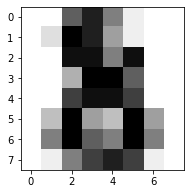

In [70]:
#Let's display the first image
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [71]:
def plot_image(number_image):
    plt.figure(number_image, figsize=(3, 3))
    plt.imshow(digits.images[-number_image], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

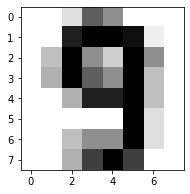

In [72]:
#Let's plot the second image using our func plot_iamge
plot_image(2)

To work with this type of image data, we must know that we have n_samples (total number of images) and n_features (total number of pixels in each image).

2. Make a train-test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [74]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [75]:
# Learn the digits on the train subset
lr = LogisticRegression(max_iter=5000, random_state=0).fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = lr.predict(X_test)

Let's compare our predict values against actual:

Classification report for classifier LogisticRegression(max_iter=5000, random_state=0):
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.81      0.81      0.81        36
           2       1.00      1.00      1.00        35
           3       0.96      0.70      0.81        37
           4       0.94      0.92      0.93        37
           5       0.90      0.95      0.92        37
           6       0.95      0.97      0.96        37
           7       0.94      0.94      0.94        36
           8       0.76      0.88      0.82        33
           9       0.79      0.92      0.85        37

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360




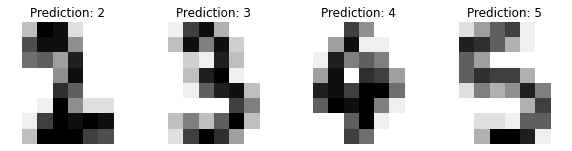

In [76]:
print(f"Classification report for classifier {lr}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

In [83]:
pca = PCA(n_components=29)
pca.fit(X_train)

print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

Explained variation per principal component: 0.9547492053786747


4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.

In [84]:
X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)

In [85]:
# Learn the digits on the train subset
lr = LogisticRegression(max_iter=5000, random_state=0).fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = lr.predict(X_test)

In [86]:
print(f"Classification report for classifier {lr}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(max_iter=5000, random_state=0):
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.83      0.81      0.82        36
           2       0.95      1.00      0.97        35
           3       0.96      0.73      0.83        37
           4       0.94      0.92      0.93        37
           5       0.92      0.97      0.95        37
           6       0.95      0.97      0.96        37
           7       0.92      0.97      0.95        36
           8       0.79      0.82      0.81        33
           9       0.79      0.92      0.85        37

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360




5.Compute the confusion matrix and count the number of instances that has gone wrong. 

Confusion matrix:
[[32  0  0  0  1  0  2  0  0  0]
 [ 0 29  0  1  0  0  0  0  0  6]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 27  0  2  0  2  5  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  2  1  0  1  1  0  1 27  0]
 [ 0  2  0  0  0  0  0  0  1 34]]


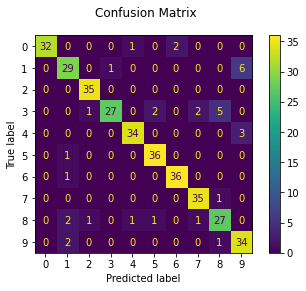

In [87]:
disp = metrics.plot_confusion_matrix(lr, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()